# The main task of the project
Identify the main factors that affect game sales worldwide using visualization tools, data preprocessing, and statistical analysis.

## Table of Contents

* [Open the file and study the general information](#Шаг_1)
* [Data preprocessing](#Шаг_2)
* [Data analysis and description](#Шаг_3)
* [Average user profile picture](#Шаг_4)
* [Hypothesis testing](#Шаг_5)
* [General conclusions](#Шаг_6)

<a id = 'Шаг_1'> </a>
### Step 1. Open the file and study the general information

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px

In [2]:
games_data = pd.read_csv('games.csv')
games_data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [3]:
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


# Data description
* Name - the name of the game
* Platform - game platform 
* Year_of_Release — year of release
* Genre-game genre
* NA_sales - sales in North America (millions of copies sold)
* EU_sales - sales in Europe (millions of copies sold)
* JP_sales - sales in Japan (millions of copies sold)
* Other_sales - sales in other countries (millions of copies sold)
* Critic_Score — critics 'score (maximum 100)
* User_Score - users' score (maximum 10)
* Rating-rating from the ESRB (English Entertainment Software Rating Board). This association determines the rating of computer games and assigns them a suitable age category.

## Conclusion

We received a table containing information about various games: the platforms on which they were released, release date, sales, rating, and age category.

We need to process the missing values, as well as change the data types in the columns with the release year and rating.

<a id = 'Шаг_2' > </a>
### Step 2. Preparing the data

Let's lower-case the column names.

In [4]:
# The map function takes 2 arguments, a function and an argument of the composite data type to which it will be applied.
games_data.columns = map(str.lower, games_data.columns)
games_data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [5]:
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
games_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Before changing the data types, we will process the missing values.

Missing values are present in the columns name, year_of_release, genre, critic_score, user_score, and rating. Let's consider each of them separately.

In [7]:
# name
games_data[games_data['name'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Removing the missing values in the name column, since the number of them is insignificant.

In [8]:
print('missing values before:', games_data['name'].isna().sum())
games_data = games_data[games_data['name'].isna() == False]
print('missing values after:', games_data['name'].isna().sum())

missing values before: 2
missing values after: 0


In [9]:
#year_of_release
games_data[games_data['year_of_release'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


There are only 269 missing values in the year of release column, which is about 1.5 percent. We can remove them .

In [10]:
print('Missing values before:', games_data['year_of_release'].isna().sum())
games_data = games_data[games_data['year_of_release'].isna() == False]
print('Missing values after:', games_data['year_of_release'].isna().sum())

Missing values before: 269
Missing values after: 0


Now let's convert the years_of_release column to the int type.

In [11]:
games_data['year_of_release'] = games_data['year_of_release'].astype(int)
games_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.4+ MB


In [12]:
games_data[games_data['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Since there are too many missing values and statistical tests need to be performed later, and filling in the omissions may distort the results, we will leave them untouched. A possible reason for some of these missing data is the low popularity of some games, since critics usually do not evaluate unpopular games, as well as the year of release, since the game industry is relatively new and objective assessments began to appear near the end of the noughties.

Consider the user_score column.

In [13]:
games_data['user_score'].value_counts()

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
0.9       2
0.6       2
0.7       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

We see the tbd value. This is an abbreviation that stands for "To Be Determined". Since we need to convert this column to a numeric type for further tests, we will replace tbd with a float value of None.

In [14]:
games_data.loc[games_data['user_score'] == 'tbd', 'user_score'] = None
games_data['user_score'] = games_data['user_score'].astype(float)

In [15]:
games_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB


Consider the rating column.

In [16]:
games_data['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

In [17]:
games_data[games_data['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


One of the reasons for the missing values is most likely that the ESRB rating company was formed only in 1994.

In [18]:
rating_query = games_data.query('year_of_release <= 1994')
rating_query['rating'].isna().sum()

481

Also, one of the possible reasons is that some games' ratings were awarded by the Japanese company CARO, and the data may have been downloaded from the ERSB database, so the values were missed. We will fill them with the value "Unknown", since they will not affect the analysis.

In [19]:
games_data['rating'] = games_data['rating'].fillna('unknown')

Calculate the total sales and add them to a separate column.

In [20]:
games_data['full_sales'] = ( games_data['na_sales'] + games_data['eu_sales']
                        + games_data['jp_sales'] + games_data['other_sales']
                           )
games_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,full_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,unknown,0.01


In [21]:
games_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  full_sales       16444 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.6+ MB


### Conclusions

We got rid of missing values where it was possible, specificaly in the columns name, year_of_release, path and rating.
In the score columns, filling in the gaps can lead to distortions in the statistical tests, so they were left out.
We also changed the data types for further analysis and added the sales amounts column.

<a id = 'Шаг_3'> </a>
## Step 3. Perform a research analysis of the data

Let's see how many games were released in different years.

In [22]:
games_by_year = games_data.groupby('year_of_release').agg({'name':'count'})
games_by_year

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


Let's build a histogram of the distribution of released games by year.

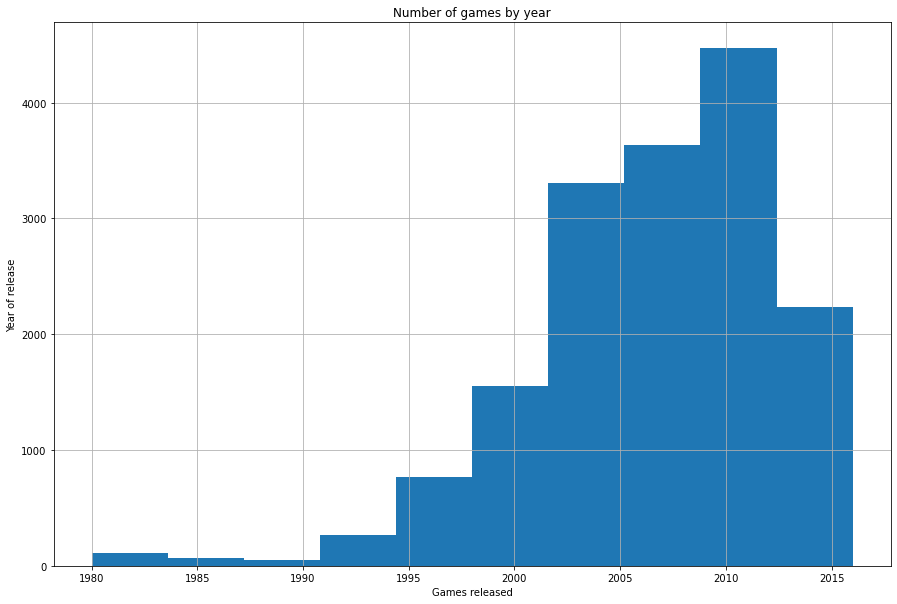

In [23]:
plt.title('Number of games by year')
hist_games = games_data['year_of_release'].hist(bins = 10, figsize = (15,10))
hist_games.set_xlabel('Games released')
hist_games.set_ylabel('Year of release')
plt.show()

We see that the number of games released is growing up to 2009 and, since 2012, we see a sharp drop. This is probably due to the growing popularity of mobile and online games.

Data on released games for the period up to 95 is very insignificant, we can say that they are not important.

Let's see how sales have changed across platforms. Let's select the platforms with the highest total sales and build a distribution by year.

In [24]:
games_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,full_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,unknown,0.01


let's look at the top 10 platforms with the biggest sales.

In [25]:
pivot_platform = games_data.pivot_table(index = 'platform', values = 'full_sales', aggfunc = 'sum')
top_platforms = pivot_platform.sort_values(by = 'full_sales',ascending = False).head(5)
top_platforms

,full_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78


Let's build the distribution of the most popular platforms by year.

to get started, let's put together a list of the top 10 platforms

In [26]:
top5_list = top_platforms.index.tolist()
top5_list

['PS2', 'X360', 'PS3', 'Wii', 'DS']

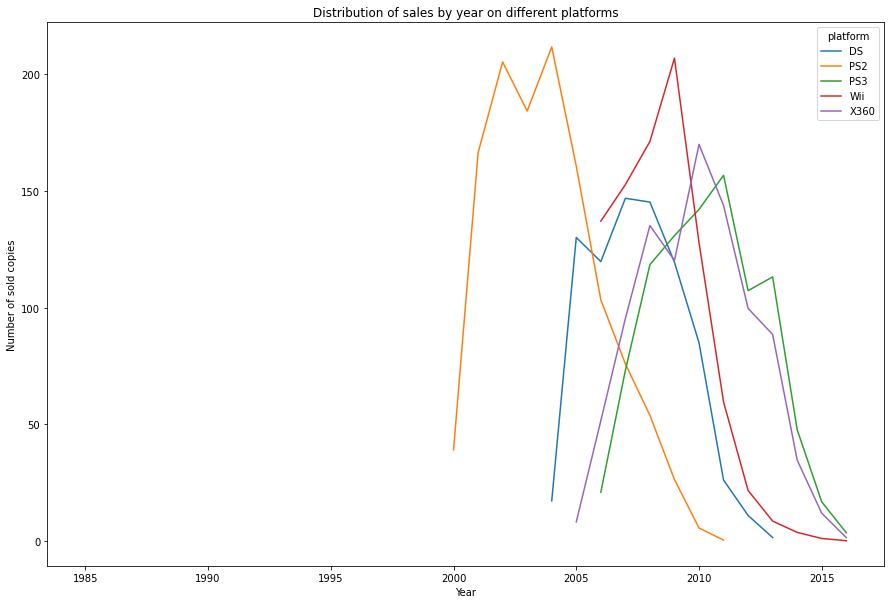

In [27]:
pivot_for_analysis = games_data.query('platform in @top5_list')
popular_platforms = pivot_for_analysis.pivot_table(
    index = 'year_of_release', columns = 'platform', values = 'full_sales', aggfunc = 'sum')
plot_for_analysis = popular_platforms.plot(figsize=(15,10))
#plot_for_analysis = sns.distplot(pivot_for_analysis, x = "year_of_release", hue="platform", kind="kde", fill=True)
plot_for_analysis.set_xlabel('Year')
plot_for_analysis.set_ylabel('Number of sold copies')
plt.title("Distribution of sales by year on different platforms")
plt.show()


In [28]:
popular_platforms.describe()

platform,DS,PS2,PS3,Wii,X360
count,11.000000,12.000000,11.000000,11.000000,12.000000
mean,72.980000,102.796667,84.667273,81.016364,80.103333
std,61.673155,79.405729,54.637565,79.136330,57.484408
min,0.020000,0.450000,3.600000,0.180000,1.520000
25%,14.140000,35.977500,34.360000,6.170000,29.045000
50%,85.020000,89.705000,107.360000,59.650000,91.995000
75%,124.975000,170.900000,124.725000,144.960000,124.032500
max,146.940000,211.810000,156.780000,206.970000,170.030000


The most popular platforms, according to the chart, have an average lifetime of about 8-10 years, after which sales become insignificant.

To determine the current period, you need to find out how much on average the platform has at least some significant sales figures

In [29]:
# Define the minimum sales level in millions
minimum_sales = 1
report = games_data.query('full_sales > @minimum_sales')
report = report[report['year_of_release'] <= 2008]
report = report.groupby('platform').agg({'year_of_release':'nunique'})#.rename(columns = {'years_of_release':'lifetime'})
median_platform_lifetime = int(report.median()[0])
print("The median lifetime of the platform is {} years ".format(median_platform_lifetime))

The median lifetime of the platform is 5 years 


We have determined the median lifetime of the platform qualitatively, and we observe a similar pattern according to the sales distribution schedule.

Let's determine the current period, and subtract the median lifetime of the platform from the last year of observation.

In [30]:
actual_data = 2016 - median_platform_lifetime
print('Actual period: from {} to 2016 year'.format(actual_data))

Actual period: from 2011 to 2016 year


In [31]:
data_for_prediction = games_data.query('@actual_data <= year_of_release <= 2016')
data_for_prediction

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,full_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01


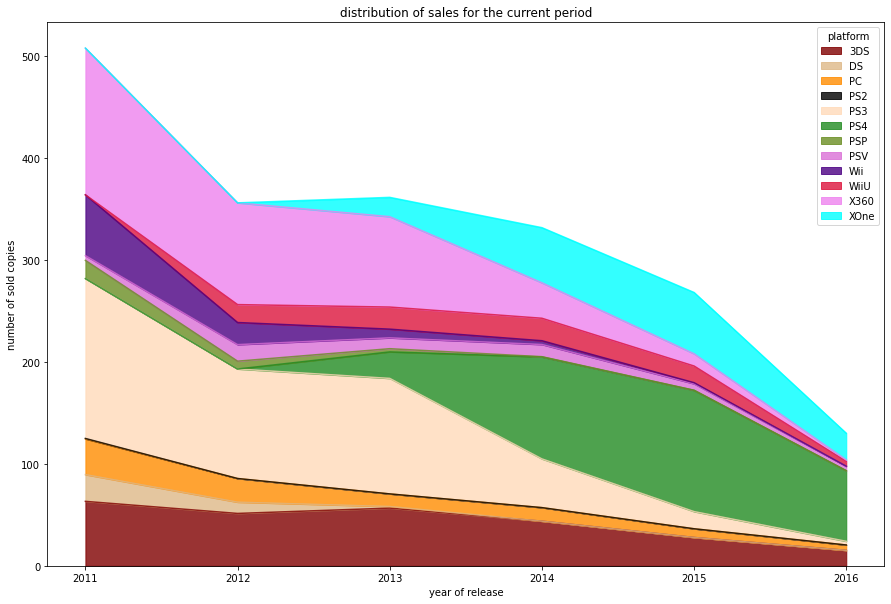

In [32]:
#a graph with accumulation for better visualization
colors = ['maroon','burlywood','darkorange','black','peachpuff','forestgreen','olivedrab', 'orchid', 'indigo',
          'crimson', 'violet', 'cyan'
         ]
plot_of_prediction = data_for_prediction.pivot_table(
    index = 'year_of_release', columns = 'platform', values = 'full_sales', aggfunc = 'sum').plot.area(
    figsize = (15,10),color = colors, alpha = 0.8
                                                                                                    )
plot_of_prediction.set_xlabel('year of release')
plot_of_prediction.set_ylabel('number of sold copies')
plt.title('distribution of sales for the current period')
plt.show()

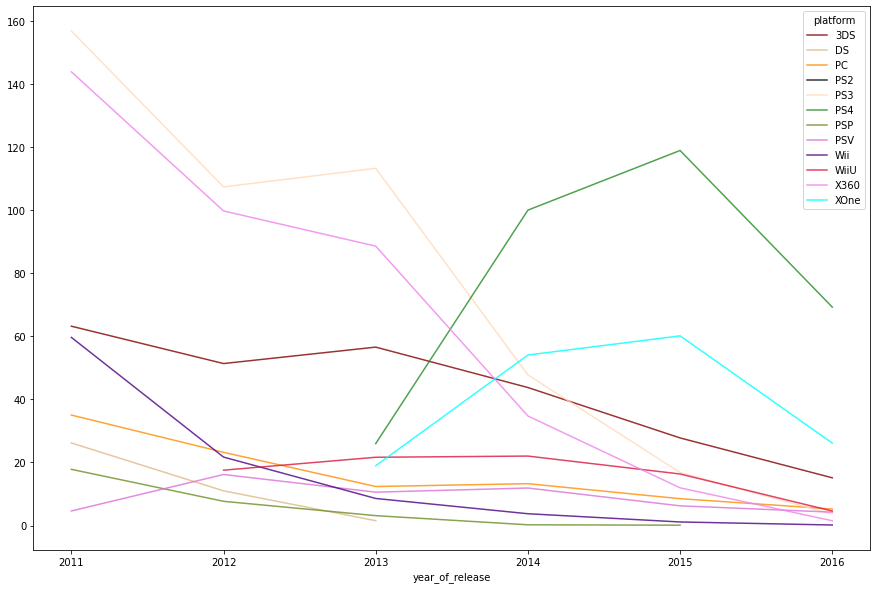

In [33]:
plot_of_prediction = data_for_prediction.pivot_table(
    index = 'year_of_release', columns = 'platform', values = 'full_sales', aggfunc = 'sum').plot(
    figsize = (15,10),color = colors, alpha = 0.8
                                                                                                    )

From the chart, we can see that the most modern ps4 and xbox one platforms are naturally leading, but by 2016 sales are falling, the platform is becoming less profitable. The Nintendo 3ds platform is also relatively popular. These three platforms can be called potentially profitable for 2017, since sales are still quite significant by 2016.

Let's build a boxplot for sales, depending on the platform.

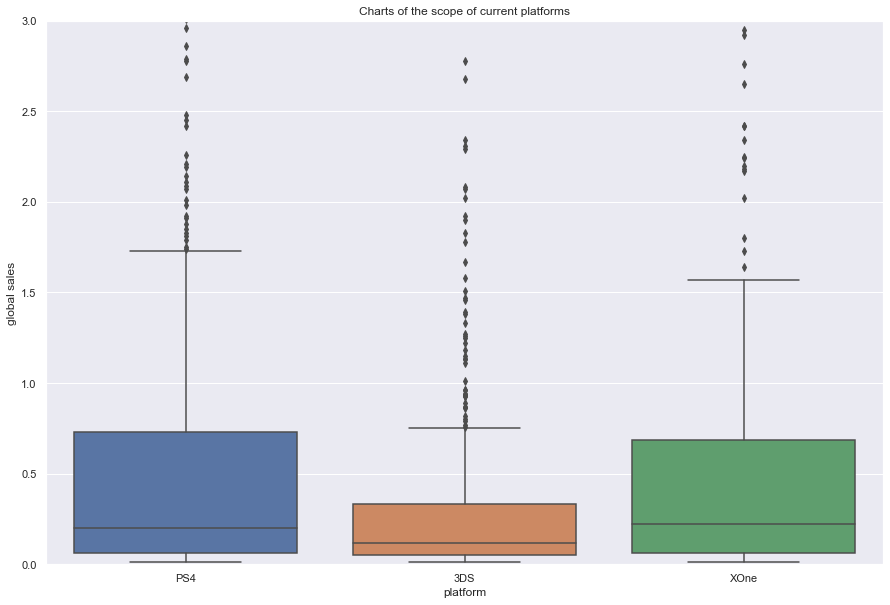

In [34]:
# Let's make a cross-section on the current platforms.
actual_platform = data_for_prediction.query('platform == "PS4" | platform == "XOne" | platform == "3DS"')
# Building a boxplot based on the resulting slice
sns.set(rc={'figure.figsize':(15, 10)})
ax = sns.boxplot(x = "platform", y = 'full_sales', data = actual_platform)
plt.ylim(0,3)
plt.title('Charts of the scope of current platforms')
ax.set_xlabel('platform')
ax.set_ylabel('global sales')
plt.show()

We see that sales on the ps4 and XOne platforms are comparable, the medians are almost at the same level. At the same time, the top quartile of the PS4 is slightly larger than that of the XOne. 3DS lags behind in sales. However, all three platforms have a large number of outliers, most of all in 3DS, which probably means that in general the platform is not very popular, but there are some exclusive games that are knocked out of the general distribution.

* Sales of games on the ps4 and xone platforms are about the same, most likely this is due to the fact that Sony and Microsoft have sufficient resources and popularity to invest in marketing companies, research, and the creation of new products, while Nintendo, in turn, does not have such resources, so sales are sagging. Some games, by agreement with companies, are released only on their platforms, and most often these companies are those that are ready to offer the best conditions, in this case, Microsoft and Sony

Let's create a function for calculating the relationship between reviews and sales for different platforms, as well as building a scatterplot

In [35]:
def correlation(platform):
    sales = data_for_prediction.query('platform == @platform')[['critic_score', 'user_score','full_sales']]
    print(sales.corr())
    pd.plotting.scatter_matrix(sales)
    plt.show()

              critic_score  user_score  full_sales
critic_score      1.000000    0.557654    0.406568
user_score        0.557654    1.000000   -0.031957
full_sales        0.406568   -0.031957    1.000000


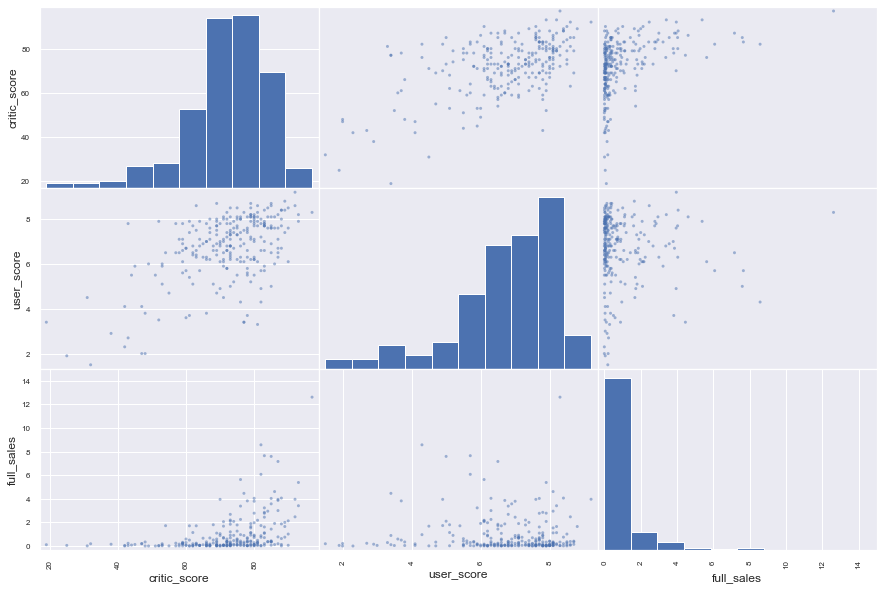

In [36]:
correlation('PS4')

              critic_score  user_score  full_sales
critic_score      1.000000    0.472462    0.416998
user_score        0.472462    1.000000   -0.068925
full_sales        0.416998   -0.068925    1.000000


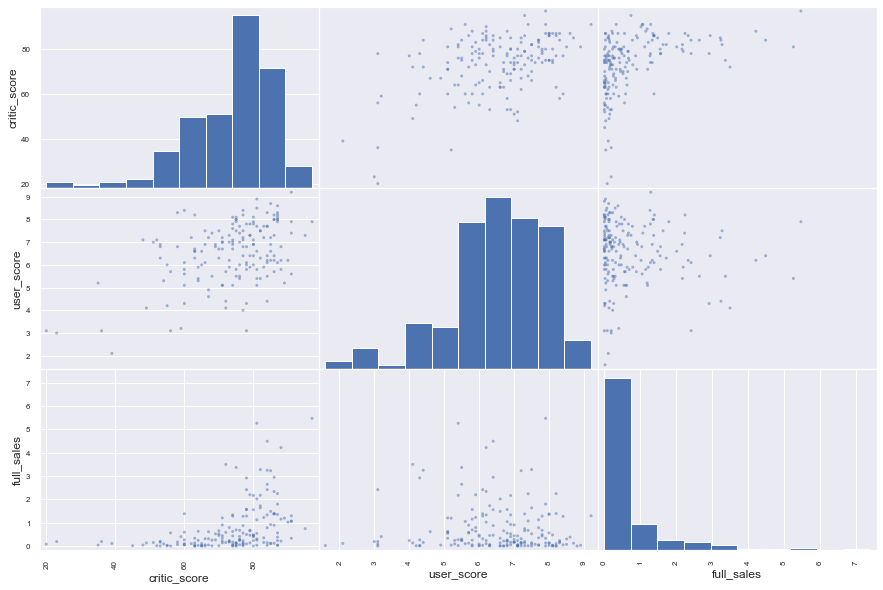

In [37]:
correlation('XOne')

              critic_score  user_score  full_sales
critic_score      1.000000    0.745222    0.348740
user_score        0.745222    1.000000    0.222078
full_sales        0.348740    0.222078    1.000000


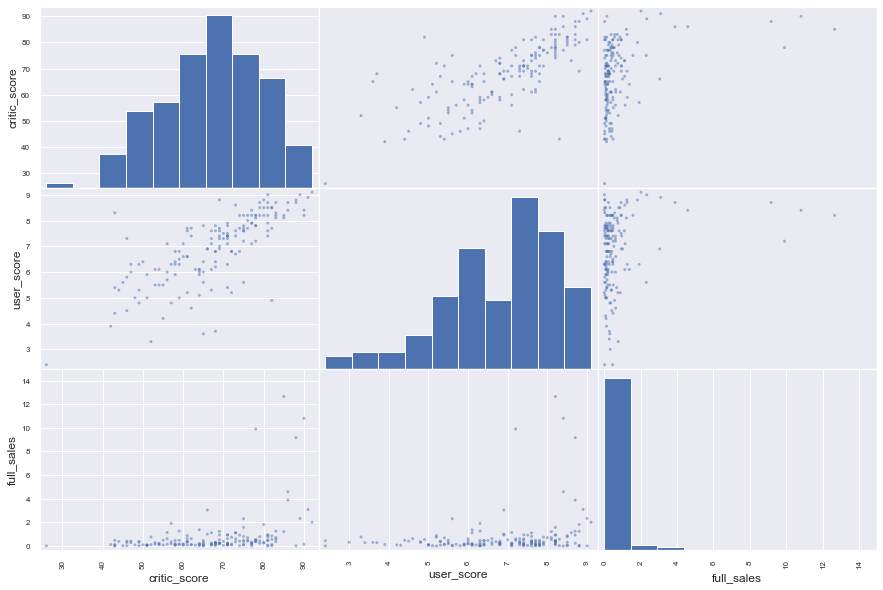

In [38]:
correlation('3DS')

From the calculated correlation coefficient and the constructed scatter plots, we can see that sales do not depend much on the evaluation of critics and do not depend on the evaluation of users. At the same time, it is worth noting that on the graphs of the dependence of sales on the evaluation of critics and users, it can be seen that with an increase in the evaluation, the number of sales outliers also increases. Perhaps the lack of dependence is due to the fact that the ratings of users and critics can often be unconstructive. Therefore, we can say that sales are influenced more by the fan community that promotes these games and the well-known name of either the company or the game itself.

Let's look at the overall distribution by genre.

In [39]:
genres = data_for_prediction.pivot_table(index = 'genre', values = 'full_sales').sort_values(by = 'full_sales', ascending = False).head()
genres

,full_sales
genre,
Shooter,1.224650
Platform,0.726885
Sports,0.609640
Role-Playing,0.528237
Racing,0.490611


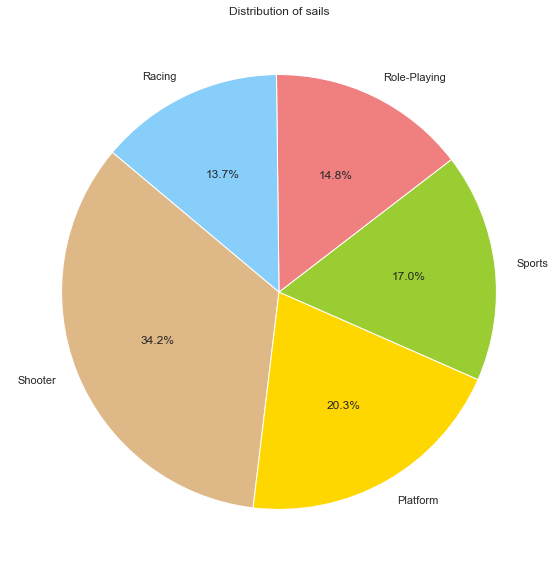

In [40]:
colors = ['burlywood','gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
sizes = genres['full_sales']
plt.pie(sizes , labels = genres.index,colors=colors,autopct='%1.1f%%', startangle=140)
plt.title('Distribution of sails')
plt.show()

In [41]:
df = data_for_prediction.copy()

The most profitable genre is a shooter, probably due to the fact that in this genre you can immediately get some emotions. Also, shooters are quite popular with esports players and various streamers, which increase the popularity of this genre. Also striking is the low sales of the adventure genre, probably due to the fact that this kind of game is usually interesting to a very narrow circle of consumers due to its specificity and the lack of a dynamic plot for the most part. Also in the adventure genre, there are rarely online modes.

### Conclusion

We determined the median lifetime of the platform and the current period (2011-2016). We also identified the most popular platforms-DS, PS2, PS3, Wii, X360 for the entire time of the study. And we also found relevant platforms that can still make a profit - ps4 and XOne.
There is no correlation between reviews and sales, however, as the ratings of critics and users increase, so does the number of outliers (over and above successful games).
We also found out that the most popular genre is shooter, and the most unclaimed is adventure.

<a id = 'Шаг_4' ></a>
## Step 4. Creating a profile of users in each region

Determine the most populat platforms(top-5).

In [42]:
regions = ['na_sales','jp_sales', 'eu_sales']
top5_pl = df.pivot_table(index = 'platform',
                        values = regions,
                        aggfunc = 'sum')
for region in regions:
    sorted_platforms = top5_pl.sort_values(by = region, ascending = False).head().loc[:,region]
    top5_list = sorted_platforms.index.tolist()
report = df.query('platform in @top5_list').groupby('platform')[regions].sum()
report = report / report.sum()
report.T

platform,3DS,PC,PS3,PS4,X360
na_sales,0.134100,0.048481,0.273003,0.176431,0.367985
jp_sales,0.594259,0.000000,0.291696,0.094259,0.019785
eu_sales,0.113619,0.105144,0.302452,0.261636,0.217149


let's build graphs

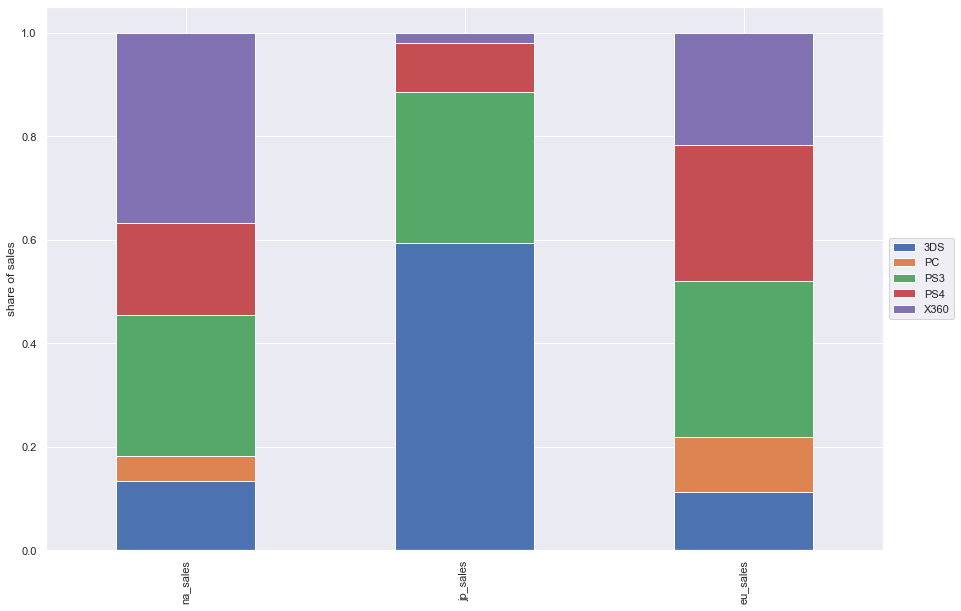

In [43]:
report.T.plot(kind = 'bar', stacked = True)
plt.legend(loc = 'center left', bbox_to_anchor = (1.0, 0.5))
plt.ylabel('share of sales')
plt.show()

From the table and graphs, we can see that in North America, the xbox 360 leads in sales, followed by the ps3. In Japan, the ps3 is outperforming all competitors by a wide margin. In Europe, sales are roughly at the same level. It is worth noting that the ps4 is ahead of the XOne in all countries. The failure of xbox in Japan is explained by the news due to failed deals and different views of representatives of the company and game manufacturers.

Let's define the most popular genres

In [44]:
top5_genre = df.pivot_table(index = 'genre',
                        values = regions,
                        aggfunc = 'sum')
for region in regions:
    sorted_genres = top5_genre.sort_values(by = region, ascending = False).head().loc[:,region]
    top5_list = sorted_genres.index.tolist()
report_genre = df.query('genre in @top5_list').groupby('genre')[regions].sum()
report_genre = report_genre / report_genre.sum()
report_genre.T

genre,Action,Racing,Role-Playing,Shooter,Sports
na_sales,0.355365,0.049214,0.128930,0.299211,0.167280
jp_sales,0.369583,0.032764,0.463983,0.069246,0.064424
eu_sales,0.369768,0.075357,0.115692,0.274875,0.164308


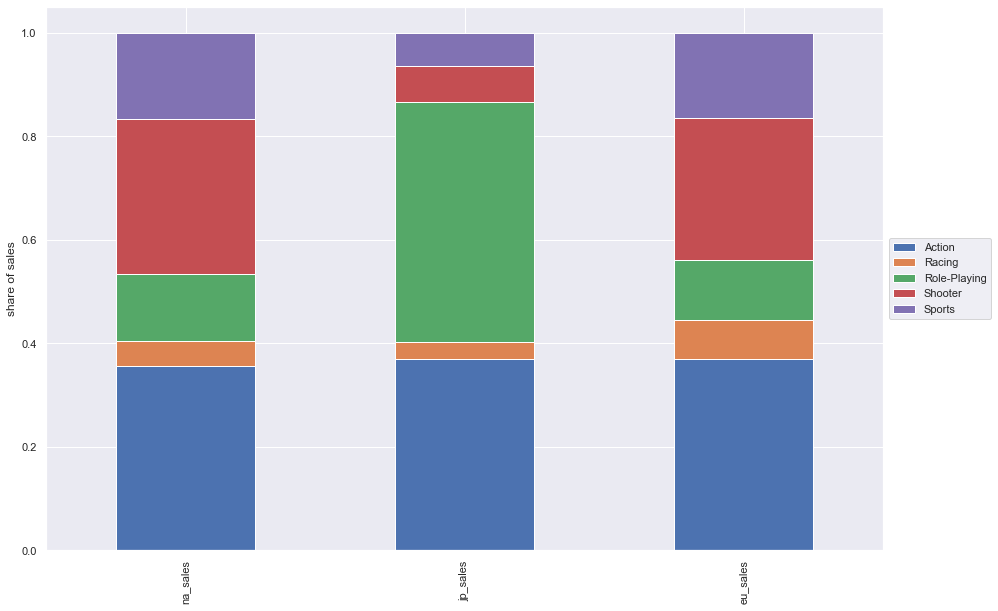

In [45]:
report_genre.T.plot(kind = 'bar', stacked = True)
plt.legend(loc = 'center left', bbox_to_anchor = (1.0, 0.5))
plt.ylabel('share of sales')
plt.show()

According to the charts, we can see that in North America and Europe, the most popular genre is Action, with shooter on the second place. At the same time, in Japan, shooter has the lowest sales, and role-playing has the largest sales. This is probably due to the peculiarities of Japanese society, as well as the gaming industry. At the same time, Action is approximately at the same level as in Europe and America.

The impact of the ESRB rating on sales.

In [46]:
esrb = df.pivot_table(index = 'rating',
                        values = regions,
                        aggfunc = 'sum')
for region in regions:
    top5_list = esrb.index.tolist()
report_esrb = df.groupby('rating')[regions].sum()
report_esrb = report_esrb / report_esrb.sum()
report_esrb.T

rating,E,E10+,EC,M,RP,T,unknown
na_sales,0.205083,0.141872,0.000506,0.371734,0.000000,0.131737,0.149067
jp_sales,0.149318,0.045715,0.000000,0.106412,0.000000,0.135925,0.562630
eu_sales,0.211604,0.116454,0.000000,0.373639,0.000045,0.124158,0.174099


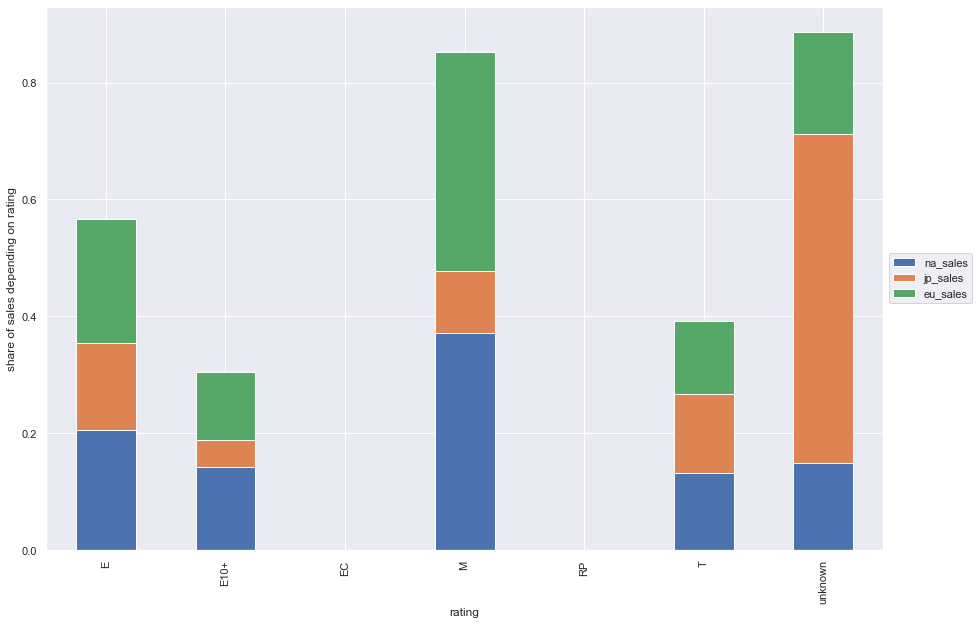

In [47]:
report_esrb.plot(kind = 'bar', stacked = True)
plt.legend(loc = 'center left', bbox_to_anchor = (1.0, 0.5))
plt.ylabel('share of sales depending on rating')
plt.show()

The share of sales in Europe and North America is approximately equally dependent on the rating, naturally, most sales fall on the adult segment, since this is the main target audience.At the same time, we can not determine the dependence for Japan, because due to its own rating system, the ESRB basically does not evaluate games in Japan and we see a characteristic large part with the value unknown.

### Conclusion

A typical consumer of the North American region is probably an adult (since the rating is M - mature), who prefers a console from Microsoft, games in the shooter and action genres. For Japan, these are more likely consoles from Sony and Nintendo, there is not enough information on age, since ratings are not available due to another rating system, the most popular genre is role - playing. A typical European consumer is also, according to the charts, an adult who prefers the action and shooter genres and most often buys consoles from Sony.

<a id = 'Шаг_5'> </a>
## Step 5. Hypothesis testing

Working hypotheses

* The average user ratings of the Xbox One and PC platforms are the same
* Average user ratings of the Action and Sports genres are different

To test hypotheses, we use the p-value criterion

The average user ratings of the Xbox One and PC platforms are the same

Let's formulate a null hypothesis: The average user ratings of the Xbox one and pc platforms are equal.

Let's formulate an alternative hypothesis: The average user ratings of the Xbox one and pc platforms differ.

In [48]:
from scipy import stats as st

Let's create samples by rating and platforms, excluding NaN.

In [49]:
xone_data = (data_for_prediction[(data_for_prediction['platform'] == "XOne") 
                                           & (data_for_prediction['user_score'].notna())]['user_score'])
pc_data = data_for_prediction[(data_for_prediction['platform'] == "PC") 
                                           & (data_for_prediction['user_score'].notna())]['user_score']   

Let's look at the variance difference across the samples.

In [50]:
print('variance difference {:.1%}'.format((1 - np.var(xone_data)/np.var(pc_data))))

variance difference 26.7%


The variances differ by more than 5%, so we pass the equal_var = False parameter, that is, we use the Welsch test.

In [51]:
results = st.ttest_ind(xone_data, pc_data, equal_var = False)
alpha = 0.05

In [52]:
print('p-values: ', results.pvalue)
if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print ("Failed to reject null hypothesis")

p-values:  0.6130712247638477
Failed to reject null hypothesis


### Conclusion

With a probability of 98%, the difference in the user rating can be obtained by chance. In the course of the results obtained in the test, we come to the conclusion that it is very likely to get similar ratings.

##### Average user ratings of the Action and Sports genres are different
Let's formulate a null hypothesis: the average user rating of the Action and Sports genres is the same

Let's formulate an alternative hypothesis: the average user rating of the Action and Sports genres is different, i.e. the average values of the samples are not equal.

Let's create samples by rating and genre, excluding NaN.

In [53]:
action_data = (data_for_prediction[(data_for_prediction['genre'] == "Action") 
                                           & (data_for_prediction['user_score'].notna())]['user_score'])
sports_data = (data_for_prediction[(data_for_prediction['genre'] == "Sports")
                                           & (data_for_prediction['user_score'].notna())]['user_score'])

Let's look at the variance difference across the samples.

In [54]:
print('variance difference {:.1%}'.format((1 - np.var(action_data)/np.var(sports_data))))

variance difference 37.0%


The variances differ by more than 5%, so we pass the equal_var = False parameter, that is, we use the Welsch test.

In [55]:
results = st.ttest_ind(action_data, sports_data, equal_var = False)
alpha = 0.05

print('p-value: ', results.pvalue)
if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print ("Failed to reject null hypothesis")

p-value:  8.285648549432565e-19
We reject the null hypothesis


### Conclusion

The p-value is small, which gives grounds to reject the null hypothesis and the assumption that there are no differences between the ratings of the Action and Sports genres. The difference in ratings by genre is not accidental.

<a id ='Шаг_6' ></a> 
## Step 6. General conclusions

During the project, data was prepared, where possible (name, year_of_release, genre, and rating) - missing values were removed, types were changed for subsequent analysis.
We determined the current period for predicting future sales (6 years), the most current platforms for the period 2010-2016 (wii, XOne, PS4), as well as the genres that are most popular (shooter)

Then we made a portrait of buyers from different regions. The results indicate that in the markets of North America and Europe, consumers behave in a similar way, their preferences (xbox and ps are close sales and action is the most popular genre) have similar sales values. At the same time, buyers from Japan behave in a radically different way: xbox is almost not represented on the market(this is due to the company's difficult entry into the market), while the most popular genre by a large margin is Role - Playing.
Also, one of the distinctive features of the data for Japan is the presence of a very large number of missing data in the age rating, this is most likely due to the fact that in Japan there is a separate company that deals with their market and has its own criteria and ratings, so the ESRB evaluates Japanese games only when entering the European/American markets. For Europe and America, it is typical that the best-selling games are rated "adult" (M-mature)

We also tested the hypotheses that:
* The average user ratings of the Xbox One and PC platforms are the same
* Average user ratings of the Action and Sports genres are different

As a result, the first and second hypotheses could not be rejected based on the results of the stat test.
That is, with a high degree of probability, we can get the same ratings for Xbox one and Pc, as well as different ratings for action and sports.

According to the results of the work done, the criteria for the success of the game were identified: The game was released within the last 6 years in America or Europe, the Action genre, the Mature age category(For adults), on the Xbox One or Playstation 4 platform.

This analysis can be applied to different time frames, both for the 1990s and for the 2020s.

The company should of course take into account the distribution region, since in Japan it should focus on role_playing games for Playstation, as well as the advertising campaign should be carried out by the action genre in all regions. In Europe and North America, the focus should be on games for everyone (E) and adults(M), xbox one and PS4 consoles, action, shooter and possibly sports genres.